# KNN Classifier

KNN é o classificador mais simples que há. A ideia é ele predizer uma classificação em relação aos seus vizinhos mais próximos, ou n_neightbors.

***Para esse classificador, redução de dimensionalidade é de extrema importância, visto que isso interfere nas distância entre os vizinhos***. Cuidados com outliers e escalas também são essenciais a esse modelo. 

Visto em conta, é também bem indicado o uso do GridSearch para encontrar o melhor param de n_neighbors, visto que diferentes valores dele, criarão modelos diferentes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

dados = {
    'A': [1,1.5,2,1.5,-1,-0.5,0,-0.5],
    'A2': [-0.5,0,-0.5,-1,1.5,2,1.5,1],
    'B': [1,1.5,1,0.5,-1,-0.5,-1,-1.5],
    'B2': [-1.5,-1,-0.5,-1,0.5,1,1.5,1],
    'y': [1,1,1,1,0,0,0,0],
    'y2': [0,0,0,0,1,1,1,1]
}

dados = pd.DataFrame(dados)

In [2]:
dados_pred = {
    'A': [2.5,1.8,0.5,-1,-1],
    'B': [2,1,0,0,-1.5],    
    'A2': [2.5,1.8,0.5,-1,-1],
    'B2': [2,1,0,0,-1.5],     
}

dados_pred = pd.DataFrame(dados_pred)

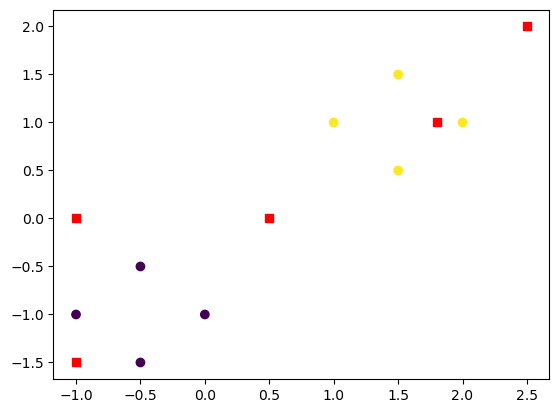

In [3]:
fig, ax = plt.subplots()

ax.scatter(x=dados.A,
           y=dados.B,
           c=dados.y,
           cmap='viridis')
ax.scatter(x=dados_pred.A,
           y=dados_pred.B,
           c='r',marker='s')

plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier

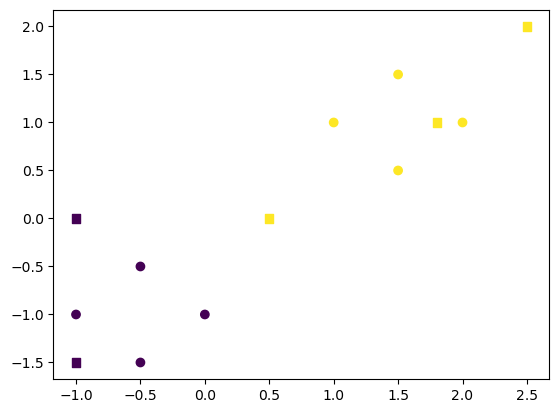

In [5]:
clf = KNeighborsClassifier(n_neighbors=3) #considerando os três pontos mais proximos

x = dados[['A','B']] #selecinando colunas de X (var independentes)
y = dados.y #categoria

x_test = dados_pred[['A','B']]
clf = clf.fit(x,y)
y_pred = clf.predict(x_test)


fig, ax = plt.subplots() #plotando o mesmo grafico mas para as cores do y_pred

ax.scatter(x=dados.A,
           y=dados.B,
           c=dados.y,
           cmap='viridis')
ax.scatter(x=dados_pred.A,
           y=dados_pred.B,
           c=y_pred,marker='s')

plt.show()

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()

In [8]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [9]:
iris1 = iris_df.loc[iris_df.target.isin([1,2])]

iris1 = iris1[['petal length (cm)','petal width (cm)','target']]

x = iris1[['petal length (cm)','petal width (cm)']]
y = iris1.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

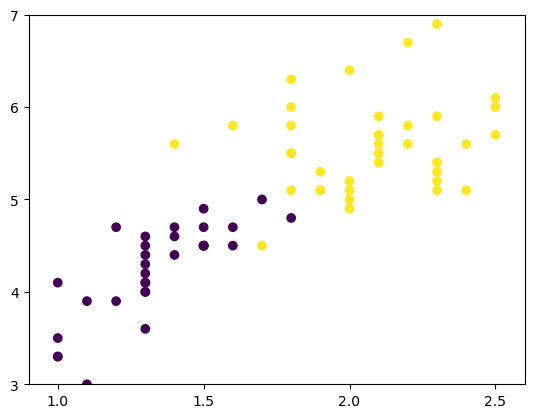

In [10]:
fig, ax = plt.subplots()

ax.scatter(x=x_train['petal width (cm)'],
           y=x_train['petal length (cm)'],
           c=y_train,
           cmap='viridis')

ax.set(xlim=(0.9, 2.6), xticks=[1,1.5,2,2.5],
       ylim=(3, 7), yticks=[3,4,5,6,7])

plt.show()

In [11]:
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
clf = clf.fit(x,y)
y_pred = clf.predict(x_test)

### Influência do param Weights

Weights refere-se à forma como os vizinhos próximos contribuem para a decisão final de classificação. Existem 2 opções principais para esse parâmetro:

Uniform: Todos os vizinhos próximos têm o mesmo peso. Ou seja, cada vizinho contribui igualmente para a decisão final. Esta é a configuração padrão.

Distance: Os vizinhos mais próximos têm maior influência na decisão do que os mais distantes. O peso de cada vizinho é inversamente proporcional à sua distância do ponto a ser classificado.

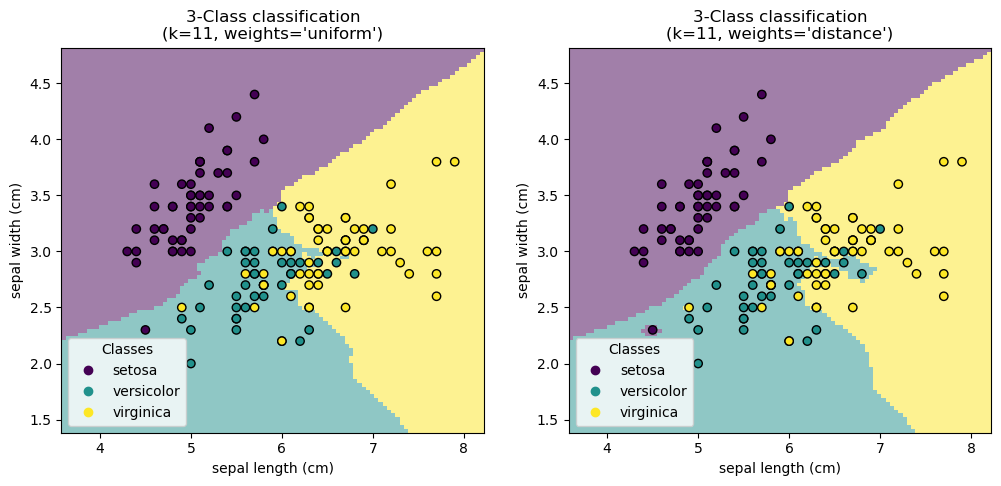

In [13]:
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)



clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

Weights influência de certa forma modelos de vizinhos próximos. Distance tende a capturar melhor nosso modelo acima

### Influência de escalonamento

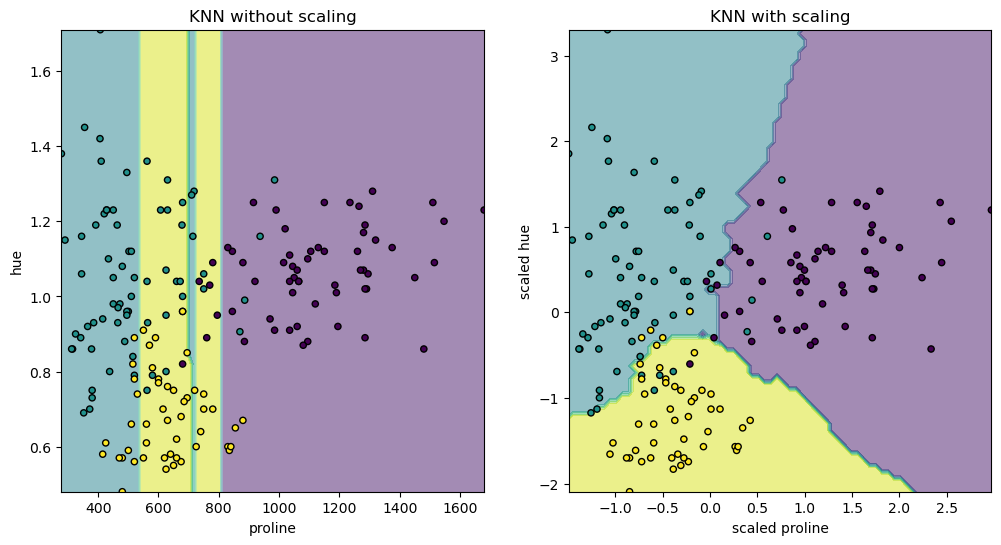

In [14]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)

X_plot = X[["proline", "hue"]]
X_plot_scaled = scaler.fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=20)


def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")

Veja como o escalonamente faz uma extrema diferença para dados em diferentes escalas